### Student Information
Name:薛擎

Student ID:112033630

GitHub ID:as825644123

Kaggle name:CHING3

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the DM2023-Lab2-master. You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 27th 11:59 pm, Wednesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 31th 11:59 pm, Sunday)__. 

### Load needed modules

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
import random
import numpy as np
import plotly.express as px
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from gensim.models import KeyedVectors

### ** >>> Exercise 1 (Take home): **  

In [8]:
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

# Concatenate train and test dataframe.
total_df = pd.concat([train_df, test_df], ignore_index=True)

print("Shape of total df: ", total_df.shape)
total_df.head()

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)
Shape of total df:  (3960, 4)


,id,text,emotion,intensity
0,20019,Cosplaying properly for the first time on Satu...,fear,0.896
1,10785,@_Inferno217_ @PaladinsGame ummm that dragons ...,anger,0.271
2,21049,Ladies and gentlemen\nAfter the tremendous suc...,fear,0.229
3,10477,When you forget to mention you were bought dre...,anger,0.458
4,30149,#ukedchat A4 Just go outside (or to the gym ha...,joy,0.688


In [9]:
### Begin Assignment Here

# https://blog.csdn.net/weixin_38278334/article/details/82320307

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(total_df["text"]) # learn the vocabulary and return document-term matrix
print(X_counts.shape)
print(count_vect.get_feature_names_out())
print(len(count_vect.get_feature_names_out()))
# 3960個documents中，共有10115種詞彙

# Using this method will be faster because the time complexity of the original method may be O(n^2).
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
indices_of_top_30 = sorted(range(len(term_frequencies)), key=lambda i: term_frequencies[i], reverse=True)[:30]

data = pd.DataFrame({
    'Vocabulary': count_vect.get_feature_names_out()[indices_of_top_30],
    'Frequency': term_frequencies[indices_of_top_30]
})

data = data.sort_values(by='Frequency', ascending=False)
fig = px.bar(data, x='Vocabulary', y='Frequency', text = 'Frequency', title='Top {} Vocabulary Frequencies'.format(30))
fig.update_traces(texttemplate = '%{text}', textposition = 'outside')
fig.update_layout(xaxis_tickangle = 45)
fig.show()

# by -> According to this to sort.
# ascendinf -> False:From big to little.

(3960, 10795)
['00' '000' '00pm' ... 'य_ब' 'सत' 'アニメ']
10795


### ** >>> Exercise 2 (Take home): **  

In [12]:
# Answer here

# TF-IDF vectorizer with 1000 features
TFIDF_1000 = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)

# Apply analyzer to training data
TFIDF_1000.fit(train_df['text'])

# Transform the training data
train_data_TFIDF_features_1000 = TFIDF_1000.transform(train_df['text'])

# Check dimension
print(train_data_TFIDF_features_1000.shape)
print(pd.DataFrame(train_data_TFIDF_features_1000.toarray(), columns = TFIDF_1000.get_feature_names_out()))

# Show feature names for features [100:110]
feature_names = TFIDF_1000.get_feature_names_out()
print("Feature names for features [100:110]:", feature_names[100:110])

c:\Users\Martin\Desktop\Master_1\Virtualenv\Python311_ML\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



(3613, 1000)
             !         #    $    %    &    '   'd  'll        'm  're  ...  \
0     0.199968  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...   
1     0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...   
2     0.000000  0.349670  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...   
3     0.000000  0.141336  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...   
4     0.181114  0.336325  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...   
...        ...       ...  ...  ...  ...  ...  ...  ...       ...  ...  ...   
3608  0.000000  0.272743  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...   
3609  0.000000  0.107584  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...   
3610  0.346252  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...   
3611  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...   
3612  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.410877  0.0  ...   

        ’    “    ”   ❤️         😂   😂😂    😕    😡 

### ** >>> Exercise 3 (Take home): **  

In [16]:
# Function for visualizing confusion_matrix

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    # tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

In [17]:
import nltk

# nltk.download('punkt')

## build analyzers (bag-of-words)
## Only use the Top 500 frequency? token in dictionary.
## Tokenizer
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

## apply analyzer to training data
## Learning Top 500 token frequency? in specific fit dictionary.
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

c:\Users\Martin\Desktop\Master_1\Virtualenv\Python311_ML\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



(3613, 500)

In [18]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data

# ---training data (features)
X_train = BOW_500.transform(train_df['text'])
# ---training labels
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [19]:
## build DecisionTree model
# random_state -> 保持隨機性的一致，確保每次執行都能得到相同的結果，方便觀察個個實驗參數的影響(Ex:training data randomly sample)
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

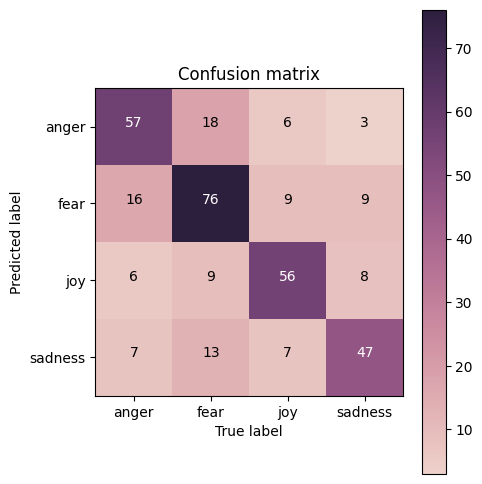

In [22]:
cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)

# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

In [ ]:
# Answer here

"""
一個好的model所顯示出的混淆矩陣基本上會是一個對角矩陣，
因為所有同類別的預測與真實結果剛好都會在對角線上。
若混淆矩陣的對角線上的數值都特別少的話，
可以想見這個模型的訓練效果不是很好，
以上方為例：
anger -> 57 18 6 3
但若是
anger -> 18 57 6 3
如果是這種結果的話，我們就可以看出有一大部分的fear都被誤判成anger，
可以想像的到anger的precision會特別低。
"""

### ** >>> Exercise 4 (Take home): **  

Accuracy of Naive Bayes model on testing data: 0.70
              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



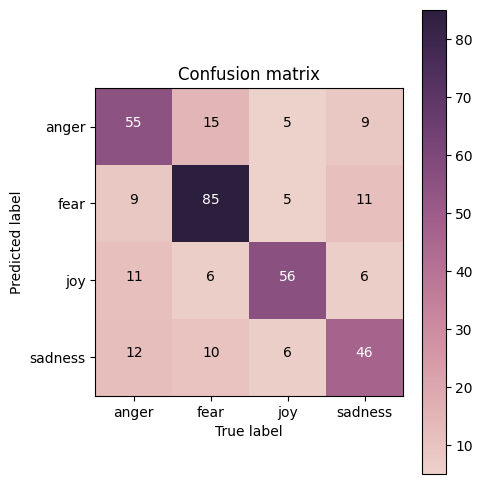

In [23]:
# Answer here

from sklearn.naive_bayes import MultinomialNB

# Create a Naive Bayes model
NB_model = MultinomialNB()

# Training the Naive Bayes model
NB_model.fit(X_train, y_train)

# Predictions on training and testing data
y_train_pred_NB = NB_model.predict(X_train)
y_test_pred_NB = NB_model.predict(X_test)

# Calculate accuracy for Naive Bayes model on testing data
accuracy_NB = accuracy_score(y_test, y_test_pred_NB)

print(f"Accuracy of Naive Bayes model on testing data: {accuracy_NB:.2f}")
print(classification_report(y_true=y_test, y_pred=y_test_pred_NB))
plot_confusion_matrix(confusion_matrix(y_true=y_test, y_pred=y_test_pred_NB) , classes=my_tags, title='Confusion matrix')

### ** >>> Exercise 5 (Take home): **  

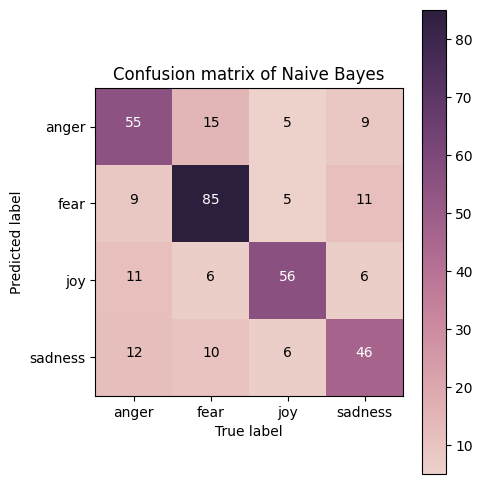

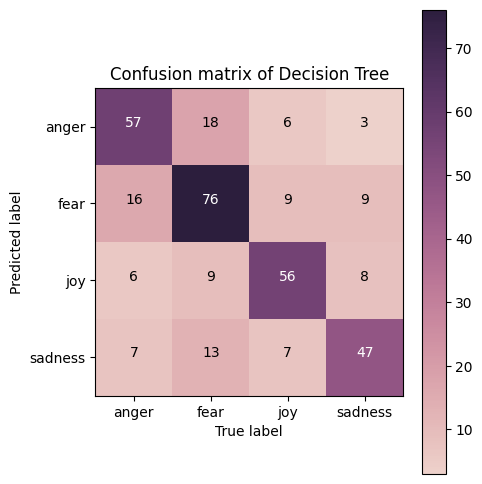

------------------------------ Naive Bayes

              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347

------------------------------ Decision Tree

              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



'\n先說明NB法和決策樹最大的差別，\nNB法通常適用於所有特徵彼此之間是獨立的任務；\n而決策樹則是適用於特徵之間有複雜的交互作用的任務。\n從結果來看，兩者的表現幾乎相同，\n我認為因為只使用text作為feature，\n所以只有一個feature的情況下並不能明顯看出兩者的差別。\n'

In [24]:
# Answer here

plot_confusion_matrix(confusion_matrix(y_true=y_test, y_pred=y_test_pred_NB) , classes=my_tags, title='Confusion matrix of Naive Bayes')
plot_confusion_matrix(confusion_matrix(y_true=y_test, y_pred=y_test_pred) , classes=my_tags, title='Confusion matrix of Decision Tree')
print("---" * 10, "Naive Bayes\n")
print(classification_report(y_true=y_test, y_pred=y_test_pred_NB))
print("---" * 10, "Decision Tree\n")
print(classification_report(y_true=y_test, y_pred=y_test_pred))

"""
先說明NB法和決策樹最大的差別，
NB法通常適用於所有特徵彼此之間是獨立的任務；
而決策樹則是適用於特徵之間有複雜的交互作用的任務。
從結果來看，兩者的表現幾乎相同，
我認為因為只使用text作為feature，
所以只有一個feature的情況下並不能明顯看出兩者的差別。
"""

### ** >>> Exercise 6 (Take home): **  

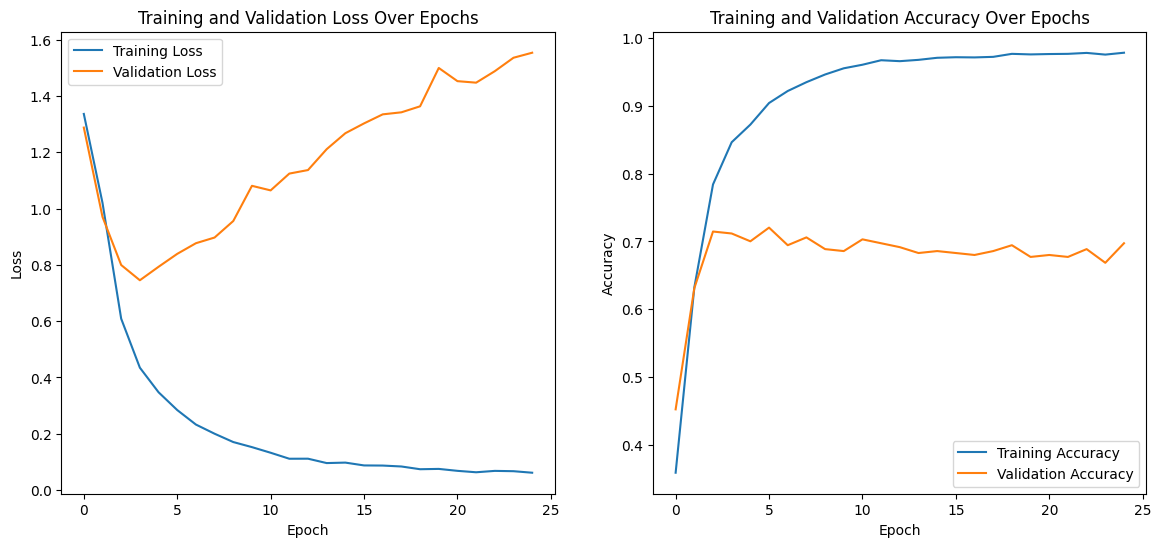

'\n從loss曲線圖來看，可以發現Training的曲線有逐漸收斂的情形，而Validation則沒有，這是最典型的overfitting的情況。\n'

In [25]:
# Answer here

fig, axes = plt.subplots(1, 2, figsize = (14, 6))

# 讀取訓練日誌
training_log = pd.read_csv("logs/training_log.csv")

# 提取數據
epochs = training_log['epoch']
train_loss = training_log['loss']
val_loss = training_log['val_loss']
train_acc = training_log['accuracy']
val_acc = training_log['val_accuracy']

# 繪製曲線圖
axes[0].plot(epochs, train_loss, label='Training Loss')
axes[0].plot(epochs, val_loss, label='Validation Loss')
axes[1].plot(epochs, train_acc, label='Training Accuracy')
axes[1].plot(epochs, val_acc, label='Validation Accuracy')

# 添加標題和標籤
axes[0].set_title('Training and Validation Loss Over Epochs')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[1].set_title('Training and Validation Accuracy Over Epochs')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')

# 添加圖例
axes[0].legend()
axes[1].legend()

# 顯示圖形
plt.show()

"""
從loss曲線圖來看，可以發現Training的曲線有逐漸收斂的情形，而Validation則沒有，這是最典型的overfitting的情況。
"""

### ** >>> Exercise 7 (Take home): **  

In [27]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

## create the training corpus
training_corpus = train_df['text_tokenized'].values

In [28]:
## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_epochs)

2023-12-25 22:16:04,937 : INFO : collecting all words and their counts
2023-12-25 22:16:04,938 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2023-12-25 22:16:04,949 : INFO : collected 11884 word types from a corpus of 72464 raw words and 3613 sentences
2023-12-25 22:16:04,950 : INFO : Creating a fresh vocabulary
2023-12-25 22:16:04,966 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 11884 unique words (100.00% of original 11884, drops 0)', 'datetime': '2023-12-25T22:16:04.966346', 'gensim': '4.3.2', 'python': '3.11.4 (tags/v3.11.4:d2340ef, Jun  7 2023, 05:45:37) [MSC v.1934 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19045-SP0', 'event': 'prepare_vocab'}
2023-12-25 22:16:04,967 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 72464 word corpus (100.00% of original 72464, drops 0)', 'datetime': '2023-12-25T22:16:04.967351', 'gensim': '4.3.2', 'python': '3.11.4 (tags/v3.11.4:d2340ef, Jun  7 2023, 05:45:37) [M

In [29]:
# Answer here

def sentence_vector(words, model):
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    
    if not word_vectors:
        # 如果句子中的詞沒有向量表示，則返回一個零向量。
        return np.zeros(model.vector_size)
    
    # 計算單詞向量的平均值
    avg_vector = np.mean(word_vectors, axis=0)
    return avg_vector

# 示例用法：
sentence = ["A", "dog", "named", "pupu"]
sentence_vec = sentence_vector(sentence, word2vec_model)

print(sentence_vec)

"""
[a] ->  [100] 100 dimesion
[a dog named pupu]  ->  [4, 100] 4*100 dimension no no no, have to be the form like [100]   ->  [Average 4, 100]
"""

[-0.09429497  0.33475712 -0.01901869  0.04491689  0.03837653 -0.60903704
  0.12200984  0.6508057  -0.2452585  -0.2871703  -0.12043125 -0.5589164
  0.11736818  0.17565177  0.21331538 -0.43279567  0.14743544 -0.31920037
  0.02175357 -0.6022555   0.22695766  0.03343191  0.2891617  -0.28107288
 -0.2002341   0.04638464 -0.3161867  -0.09402085 -0.36889622  0.04627791
  0.34453917 -0.10877024  0.15045959 -0.41906714 -0.1260748   0.22553296
  0.08139452  0.07847    -0.17754592 -0.4747337   0.09582771 -0.20686819
 -0.22107536 -0.07475926  0.20554818 -0.13382621 -0.34302187 -0.07054339
  0.21932893  0.24973215  0.12420729 -0.3256385   0.0165688   0.05576239
 -0.05790637  0.21870477  0.31202462 -0.01921041 -0.37980387  0.11469773
  0.03784716 -0.09806675  0.14898111  0.09783126 -0.31775853  0.37056157
 -0.06904336  0.3878784  -0.43709037  0.29847133 -0.05307141  0.25455567
  0.52462786 -0.0272649   0.49189255  0.01467643  0.1094554   0.02150839
 -0.33707544 -0.05468299 -0.34249303 -0.05756262 -0.

'\n[a] ->  [100] 100 dimesion\n[a dog named pupu]  ->  [4, 100] 4*100 dimension no no no, have to be the form like [100]   ->  [Average 4, 100]\n'

### ** >>> Exercise 8 (Take home): **  

In [31]:
## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin."
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)

2023-12-25 22:18:15,582 : INFO : loading projection weights from GoogleNews/GoogleNews-vectors-negative300.bin.
2023-12-25 22:18:28,075 : INFO : KeyedVectors lifecycle event {'msg': 'loaded (3000000, 300) matrix of type float32 from GoogleNews/GoogleNews-vectors-negative300.bin.', 'binary': True, 'encoding': 'utf8', 'datetime': '2023-12-25T22:18:28.075721', 'gensim': '4.3.2', 'python': '3.11.4 (tags/v3.11.4:d2340ef, Jun  7 2023, 05:45:37) [MSC v.1934 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19045-SP0', 'event': 'load_word2vec_format'}


happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'information', 'database', 'Data_System_IPEDS', 'data.The', 'OpenSpirit_enabled', 'datafeeds', 'microdata', 'operator_Telecity', 'GT_Datamaker', 'datawarehouse']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner', 'uranium_mining', 'miners', 'Mountaintop_removal_coal', 'goldmining', 'alluvial_mining', 'Ok_Tedi_copper', 'uranium_mines', 'coal_mines', 'openpit_mining', 'Mines']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted

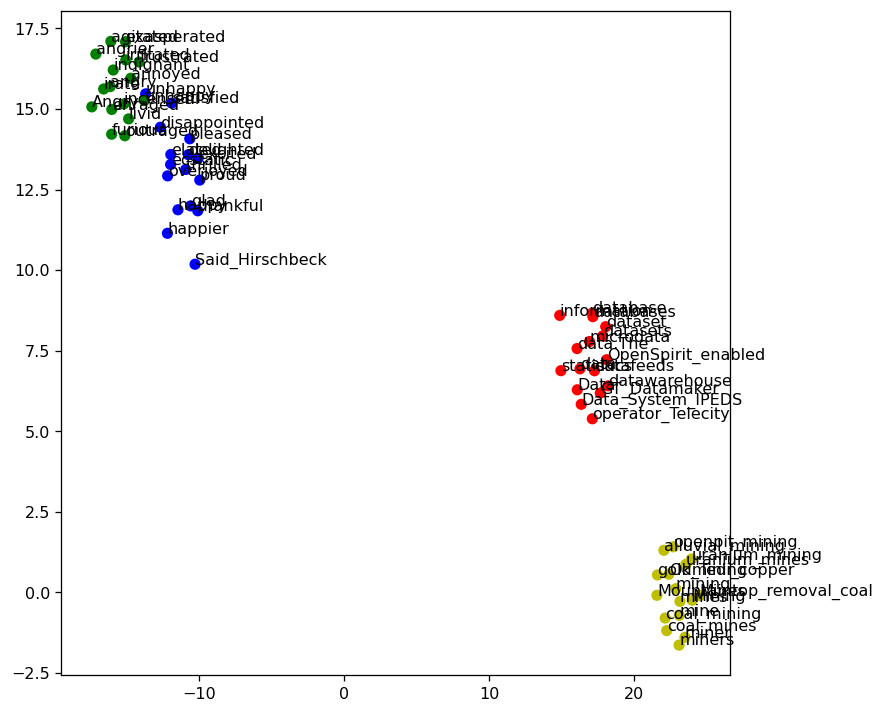

In [32]:
# Answer here

word_list = ['happy', 'angry', 'data', 'mining']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

## w2v model
model = w2v_google_model

## prepare training word vectors
# 從model中取出200單辭，用於增加訓練資料
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
# n_component轉換之低維維度
# metric設定高維空間中，向量之間的相似度計算方式，這邊採用cosine similarity
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
# 學習(fit)並套用(tranform)
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()